预先导入库，为了接下来通过CountVectorizer或TfidfVectorizer将文本数据转换为特征矩阵，然后使用KMeans聚类算法进行聚类分析，进而利用PCA进行降维，并最终通过Matplotlib进行可视化，绘制聚类结果的图表。

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

观察数据基本信息与统计摘要

In [8]:
data_df = pd.read_csv("D:\桌面\data\[UCI] AAAI-14 Accepted Papers - Papers.csv") # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3) # 显示前三条数据

data_df.info() # 显示数据基本信息
data_df.describe() # 显示数据统计摘要

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     398 non-null    object
 1   authors   398 non-null    object
 2   groups    396 non-null    object
 3   keywords  398 non-null    object
 4   topics    394 non-null    object
 5   abstract  398 non-null    object
dtypes: object(6)
memory usage: 18.8+ KB


,title,authors,groups,keywords,topics,abstract
count,398,398,396,398,394,398
unique,398,391,125,398,350,398
top,Kernelized Bayesian Transfer Learning,"Deguang Kong, Chris Ding and Qihe Pan",Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,GTEP: Social Choice / Voting,Transfer learning considers related but distin...
freq,1,3,50,1,7,1


 检查数据是否有缺失值(NaN)
 使用 isnull() 方法返回一个布尔值的 DataFrame，表示每个元素是否为 NaN 使用 any() 方法返回一个布尔值的 Series，表示每列是否有 NaN
 使用 sum() 方法返回一个整数，表示有多少列有 NaN
如果有 NaN，打印出哪些列有 NaN

In [9]:

if data_df.isnull().any().sum() > 0:
    print('数据丢失(NaN)\n>>>feature:', data_df.columns[data_df.isnull().any()].tolist())

# 将缺失值替换为空格
# 使用 fillna() 方法，传入一个空格字符串作为参数，替换所有的 NaN
data_df = data_df.fillna(' ')

# 合并特征，整合为完整的 paper 信息
# 使用 apply() 方法，传入一个 lambda 函数作为参数，将每行的特征用空格连接起来
# 使用 join() 方法，传入一个空格字符串作为参数，将每个特征的值用空格连接起来
# 将结果赋值给一个新的列 paper
data_df['paper'] = data_df.apply(lambda x: ' '.join(x), axis=1)

# 打印 paper 列的值
data_df.paper

数据丢失(NaN)
>>>feature: ['groups', 'topics']


0      Kernelized Bayesian Transfer Learning Mehmet G...
1      "Source Free" Transfer Learning for Text Class...
2      A Generalization of Probabilistic Serial to Ra...
3      Lifetime Lexical Variation in Social Media Lia...
4      Hybrid Singular Value Thresholding for Tensor ...
                             ...                        
393    Mapping Users Across Networks by Manifold Alig...
394    Compact Aspect Embedding For Diversified Query...
395    Contraction and Revision over DL-Lite TBoxes Z...
396    Zero Pronoun Resolution as Ranking Chen Chen a...
397    Supervised Transfer Sparse Coding Maruan Al-Sh...
Name: paper, Length: 398, dtype: object

In [10]:
# max_df=0.95表示过滤一些在90%的文档中都出现过的词，min_df=10表示在所有文档中出现低于10次的词。
vectorizer1 = CountVectorizer(max_df=0.95, min_df=10)
X1 = vectorizer1.fit_transform(data_df.paper)
vectorizer1.get_feature_names_out()[:21:1]

print(X1.toarray()[0])
print(X1.shape)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 1 3 0 1 0 0 0 0 0
 0 0 0 0 0 2 1 0 0 0 1 0 1 0 0 0 0 0 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 6 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 3 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 3 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 2 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 0 0 0 0 0 0 1 0 3 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [11]:
# max_df=0.95表示过滤一些在90%的文档中都出现过的词，min_df=10表示在所有文档中出现低于10次的词。
vectorizer2 = TfidfVectorizer(max_df=0.95, min_df=10)
X2 = vectorizer2.fit_transform(data_df.paper)
vectorizer2.get_feature_names_out()[:21:1]
print(X2.toarray()[0])
print(X2.shape)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.20535401 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03545783 0.08874858
 0.         0.0449059  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.14837693 0.02627752 0.         0.         0.         0.05101451
 0.         0.03314438 0.         0.         0.         0.
 0.         0.12554261 0.02443759 0.04213644 0.02620282 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02834912 0.18629671
 0.02958286 0.         0.         0.         0.         0.
 0.         0.         0.         0.0627713  0.         0.
 0.         0.         0.04273547 0.         0.07562167 0.
 0.         0.         0.         0.         0.04335711 0.
 0.         0.         0.0286922

定义kmeansTest的函数，该函数接受特征矩阵X和聚类数目clu作为参数，使用KMeans算法进行聚类，并返回聚类结果y_pred。

In [12]:

def kmeansTest(X,clu):
    k_means = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=clu, n_init=10, random_state=None, tol=0.0001, verbose=0)
    k_means.fit(X)
    y_pred = k_means.predict(X)
    return y_pred

y_pred_dict={} # 聚类结果字典数据
clu_range=range(5,14)
for clu in clu_range:
    y_pred_dict[clu]=kmeansTest(X1,clu)
print(y_pred_dict[5]) # 显示clu=5的聚类结果

c:\Users\86132\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


[1 1 2 0 1 0 0 1 0 1 0 3 1 0 4 1 2 0 1 0 0 3 0 1 1 0 0 0 1 0 2 4 1 1 2 3 1
 2 1 2 1 3 1 1 2 3 1 1 0 0 0 0 0 0 1 0 3 2 0 1 2 0 0 1 0 2 3 2 0 3 2 3 1 1
 0 0 3 2 0 2 0 0 1 0 0 0 1 0 1 1 1 0 4 0 1 0 0 2 1 0 3 0 1 0 3 0 1 4 1 3 2
 3 0 3 0 0 0 2 1 1 0 1 1 4 2 1 0 4 1 3 1 3 1 0 2 2 1 1 4 0 3 0 0 1 1 1 0 1
 4 2 1 0 0 0 1 4 0 4 1 0 1 2 3 1 0 0 2 0 3 0 3 2 4 3 3 1 1 3 2 3 3 2 1 0 3
 0 0 0 2 2 2 2 0 1 1 3 4 2 0 1 0 0 1 0 0 3 4 0 1 0 1 1 3 0 0 0 4 1 0 0 1 1
 1 1 2 1 0 0 0 1 3 0 1 2 0 0 0 0 0 0 1 0 1 1 0 2 1 0 0 0 0 1 2 0 1 0 0 0 1
 1 1 2 0 0 1 2 4 1 0 0 2 1 2 1 1 1 0 0 1 3 1 4 1 0 0 1 0 3 1 0 0 0 0 1 3 2
 0 0 1 1 1 1 1 2 2 1 1 2 3 1 0 3 4 2 0 4 0 2 1 1 2 3 1 1 3 2 3 1 1 1 0 1 1
 0 0 1 2 2 0 1 3 3 2 2 0 0 4 2 3 0 1 0 3 1 3 1 3 3 3 2 1 0 0 1 1 1 2 0 0 0
 2 0 1 1 3 0 0 4 1 1 2 0 1 3 0 1 0 0 1 0 2 4 1 0 0 3 0 1]


使用主成分分析（PCA）对特征矩阵X1进行降维，将其转换为一个包含两个主成分的新矩阵X1_pca2。

In [13]:
pca = PCA(n_components=2)
X1_pca2 = pca.fit_transform(X1.toarray())
X1_pca2.shape

(398, 2)

定义scatter2D的函数，用于在2D空间中绘制散点图。函数接受参数X_2D（包含两个主成分的数据）、clu（聚类数目）、row和col（图表的行和列索引）

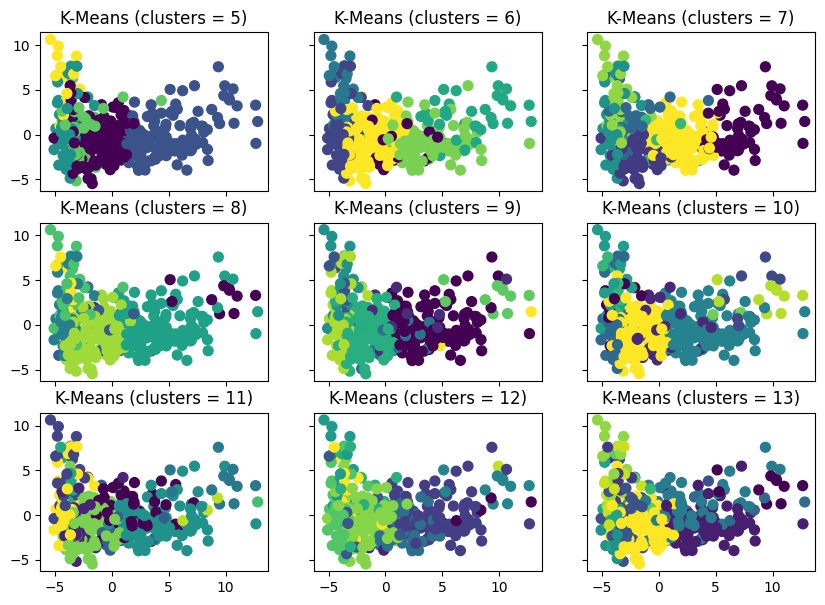

In [14]:

def scatter2D(X_2D,clu,row,col):
    axs[row,col].scatter(X_2D[:, 0], X_2D[:, 1], c=y_pred_dict[clu], s=50, cmap='viridis')
    axs[row,col].set_title("K-Means (clusters = %d)"%clu)

clu=5
ROW=3;COL=3
fig,axs = plt.subplots(ROW,COL,sharex=True,sharey=True,figsize=(10, 7))
for row in range(ROW):
    for col in range(COL):
        scatter2D(X1_pca2,clu,row,col)
        clu += 1
plt.show()

首先通过PCA将高维特征矩阵`X1`降维为包含三个主成分的`X1_pca3`矩阵。接着定义了`scatter3D`函数，用于在3D空间绘制散点图，接受`X_3D`和`clu`作为参数。在主程序中，通过循环遍历`clu_range`，调用`scatter3D`函数，展示不同聚类数目下的3D散点图。

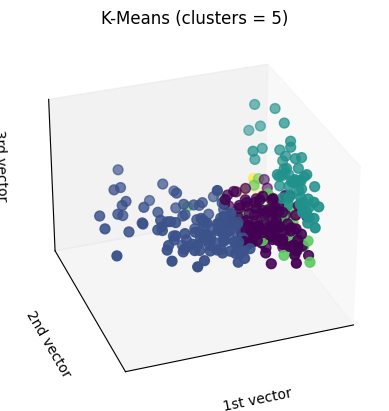

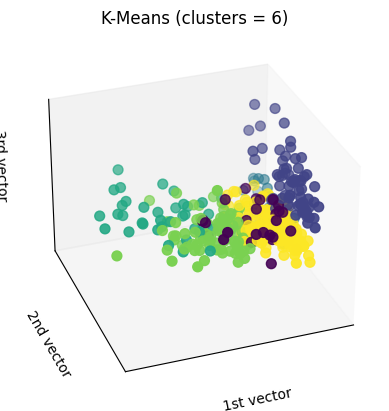

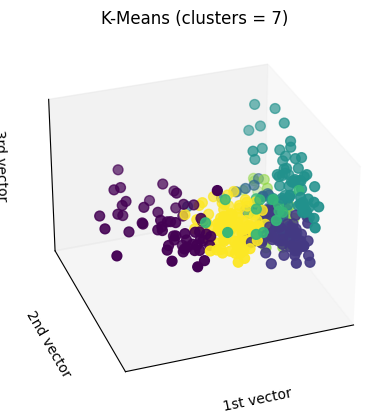

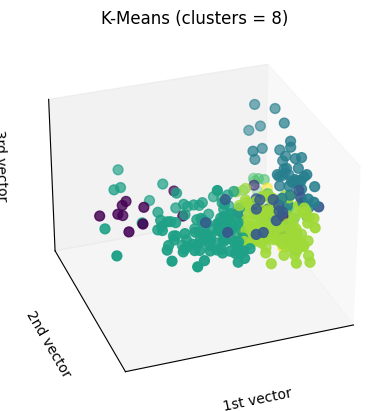

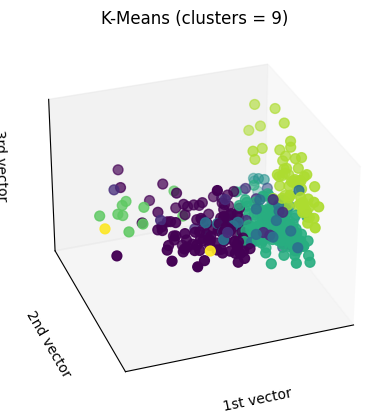

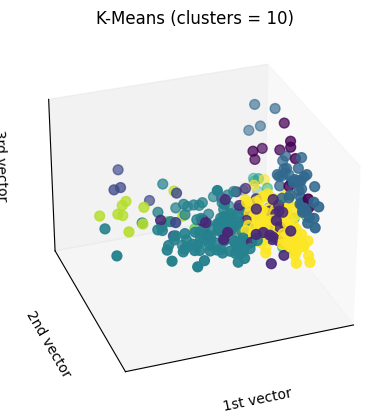

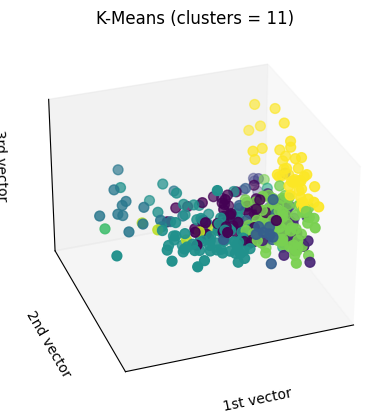

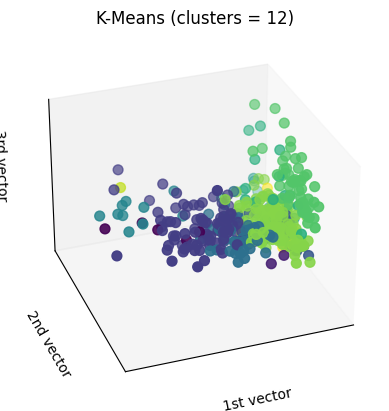

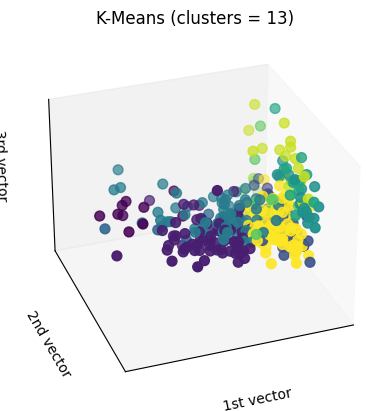

In [15]:
Pca = PCA(n_components=3)
X1_pca3=Pca.fit_transform(X1.toarray())
X1_pca3.shape

# 函数说明:3D散点图
# Parameters:
#     X_3D - 三维数据
#     clu - cluster簇的数量
# Returns: None
def scatter3D(X_3D,clu):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
    ax.scatter(X_3D[:, 0],X_3D[:, 1],X_3D[:, 2],
               c=y_pred_dict[clu],cmap='viridis',s=50,)
    
    ax.set_title("K-Means (clusters = %d)"%(clu))
    ax.set_xlabel("1st vector")
    ax.set_xticks([]) # 替换 w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd vector")
    ax.set_yticks([])
    ax.set_zlabel("3rd vector")
    ax.set_zticks([]) 
    plt.show()

for clu in clu_range:
    scatter3D(X1_pca3,clu)
